In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score

In [2]:
train = pd.read_csv(r'C:\Arya KR\PERSONAL\Python\My projects\Mobile Price\train.csv')
test = pd.read_csv(r'C:\Arya KR\PERSONAL\Python\My projects\Mobile Price\test.csv')

`In this data:
id:ID
battery_power:Total energy a battery can store in one time measured in mAh
blue:Has bluetooth or not
clock_speed:speed at which microprocessor executes instructions
dual_sim:Has dual sim support or not
fc:Front Camera mega pixels
four_g:Has 4G or not
int_memory:Internal Memory in Gigabytes
m_dep:Mobile Depth in cm
mobile_wt:Weight of mobile phone
n_cores:Number of cores of processor
pc:Primary Camera mega pixels
px_height:Pixel Resolution Height
px_width:Pixel Resolution Width
ram:Random Access Memory in Megabytes
sc_h:Screen Height of mobile in cm
sc_w:Screen Width of mobile in cm
talk_time:longest time that a single battery charge will last when you are
three_g:Has 3G or not
touch_screen:Has touch screen or not
wifi:Has wifi or not`

In [3]:
train.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
test.head()

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

In [3]:
test = test.drop(['id'],axis = 1)

In [8]:
#sns.pairplot(train,hue = 'price_range')

<AxesSubplot:>

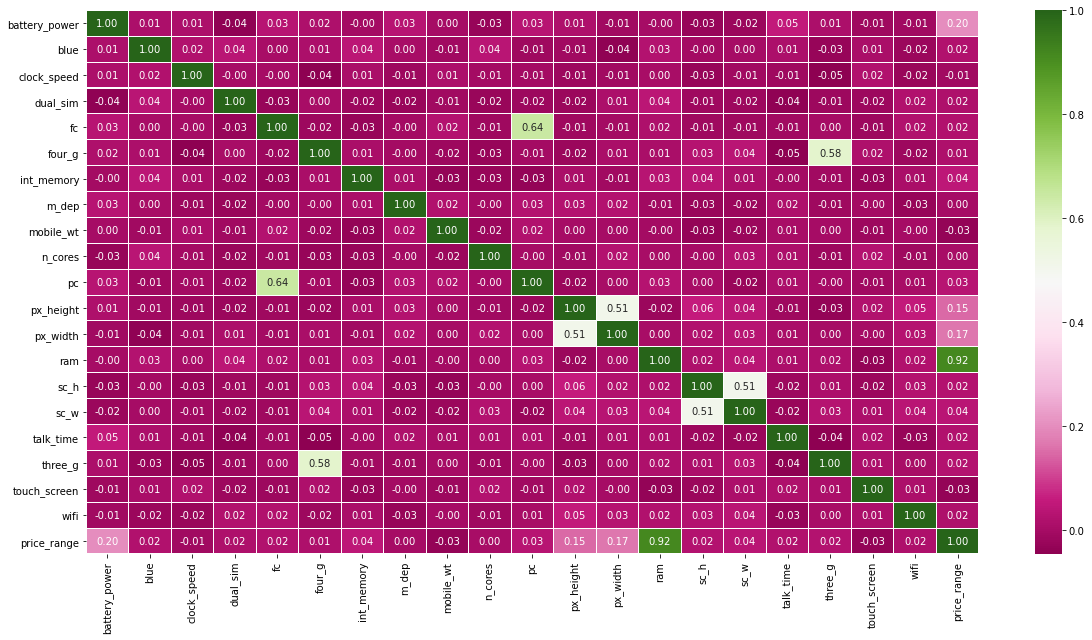

In [12]:
fig,ax = plt.subplots(figsize = (20,10))
sns.heatmap(train.corr(),annot= True,fmt='.2f',linewidths=0.05,cmap='PiYG')

In [9]:
train.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

C:\Users\Arya Nivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


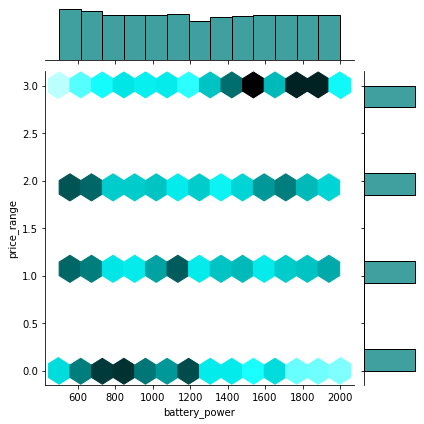

In [27]:
x= train['battery_power']
y= train['price_range']
sns.jointplot(x,y,data=train,color='teal',kind='hex');

In [13]:
train['price_range'].value_counts()

0    500
1    500
2    500
3    500
Name: price_range, dtype: int64

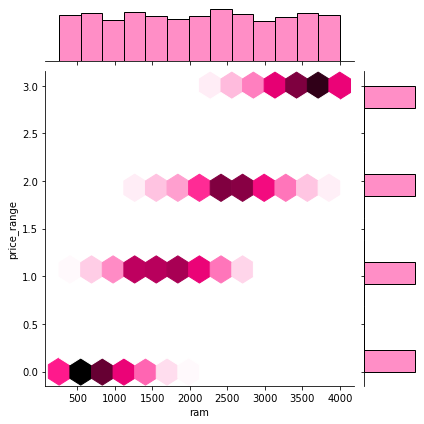

In [35]:
sns.jointplot(x='ram',y='price_range',data=train,color='hotpink',kind='hex');

In [33]:
train['int_memory'].value_counts()

27    47
16    45
14    45
2     42
57    42
      ..
25    24
38    23
62    21
4     20
59    18
Name: int_memory, Length: 63, dtype: int64

C:\Users\Arya Nivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

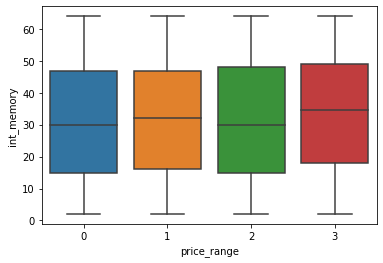

In [43]:
x =  train['price_range']
y = train['int_memory']
sns.boxplot(x,y)

C:\Users\Arya Nivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

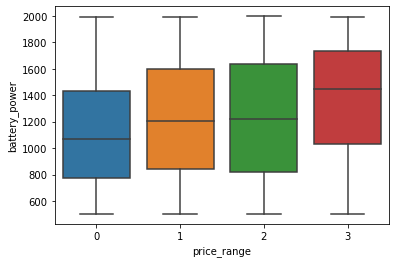

In [62]:
x =  train['price_range']
y = train['battery_power']
sns.boxplot(x,y)

In [48]:
train.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [53]:
train['blue'].value_counts()

0    1010
1     990
Name: blue, dtype: int64

Text(0.5, 0, 'MegaPixels')

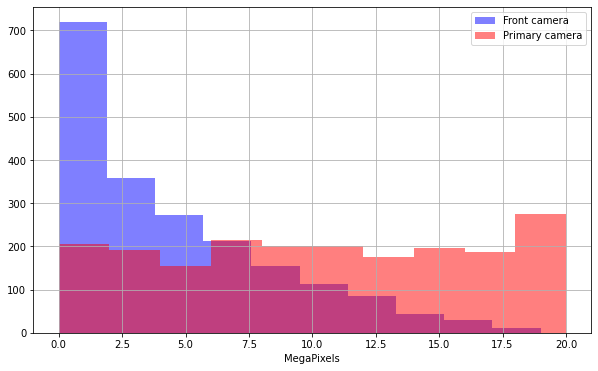

In [63]:
plt.figure(figsize=(10,6))
train['fc'].hist(alpha=0.5,color='blue',label='Front camera')
train['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

In [71]:
x = train.drop('price_range',axis = 1)
y = train['price_range']

In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 42)

**Linear regression**

In [98]:
from sklearn.linear_model import LinearRegression
ln = LinearRegression()
ln.fit(x_train,y_train)

y_pred_ln = ln.predict(x_test)
print('r2 value is ',r2_score(y_test,y_pred_ln))


r2 value is  0.9192961986603745


**KNN**

In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10,)

knn.fit(x_train,y_train)
y_pred_knn = knn.predict(x_test)

print('r2 value is ',r2_score(y_test,y_pred_knn))
accuracy_score(y_test,y_pred_knn)

r2 value is  0.9522336176717124


0.938

**Logestic regression**

In [100]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

lg.fit(x_train,y_train)
y_pred_lg = lg.predict(x_test)

print('r2 score ',r2_score(y_test,y_pred_lg))
print('accuracy score',accuracy_score(y_test,y_pred_lg))

r2 score  0.6394408559735714
accuracy score 0.616


C:\Users\Arya Nivi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



**Decision tree**

In [96]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred_dtc = dtc.predict(x_test)

print('accuracy: ',accuracy_score(y_test,y_pred_dtc))

accuracy:  0.816


**Random Forest**

In [103]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier( random_state = 1)
rfc.fit(x_train,y_train)
y_pred_rfc = rfc.predict(x_test)

print('accuracy: ',accuracy_score(y_test,y_pred_rfc))

accuracy:  0.876


### Predicting the output

>`KNN` has more accuracy, so predicting test data output using KNN method

In [104]:
y_pred = knn.predict(test)

In [105]:
test['price_range'] = y_pred

In [106]:
test.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,1043,1,1.8,1,14,0,5,0.1,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,...,749,810,1773,15,8,7,1,0,1,1
